In [1]:
# import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
## reading ga ads dataframe

In [33]:
ga = pd.read_csv('ga_db.csv',encoding= 'unicode_escape')

In [34]:
## plotting first 5 rows
ga.head()

,date,market,channel,new_users,pageviews,product_revenue,quantity,session_duration,sessions,shipping,tax,time_on_page,revenue,transaction_revenue,unique_purchase,campaign_id
0,2019-05-14,Other,Direct,8,21,0.0,0,944,8,0.0,0.0,945,0.0,0,0,ID_1
1,2019-05-14,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,ID_1
2,2019-05-14,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,ID_1
3,2019-05-14,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,ID_1
4,2019-05-14,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,ID_1


In [35]:
#plotting data type
ga.dtypes

date                    object
market                  object
channel                 object
new_users                int64
pageviews                int64
product_revenue        float64
quantity                 int64
session_duration         int64
sessions                 int64
shipping               float64
tax                    float64
time_on_page             int64
revenue                float64
transaction_revenue      int64
unique_purchase          int64
campaign_id             object
dtype: object

In [36]:
# convert column date to proper format

In [37]:
ga['date'] = pd.to_datetime(ga['date'])

In [38]:
# create the new column day

In [39]:
ga['day'] = ga['date'].dt.day

In [40]:
#re-set column order

In [41]:
column_names = [
'date',
'day',
'campaign_id',
'market',
'channel',
'new_users',
'pageviews',
'product_revenue',
'quantity',
'session_duration',
'sessions',
'shipping',
'tax',
'time_on_page',
'revenue',
'transaction_revenue',
'unique_purchase'
]

ga = ga.reindex(columns=column_names)

In [42]:
type(ga)

pandas.core.frame.DataFrame

In [43]:
ga.head()

,date,day,campaign_id,market,channel,new_users,pageviews,product_revenue,quantity,session_duration,sessions,shipping,tax,time_on_page,revenue,transaction_revenue,unique_purchase
0,2019-05-14,14,ID_1,Other,Direct,8,21,0.0,0,944,8,0.0,0.0,945,0.0,0,0
1,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0
2,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0
3,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0
4,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0


In [44]:
ga['market'].nunique()

16

In [45]:
ga['market'].unique()

array(['Other', 'DE', 'ES', 'UK', 'FR', 'IE', 'IT', 'PL', 'SE', 'NL',
       'DK', 'PT', 'CZ', 'AT', 'BE', 'CH'], dtype=object)

In [46]:
## joining ga with a coordinates look up table, containing LATITUDE and LONGITUDE coordinates (join with excel file)

In [47]:
coordinates = pd.read_excel('coordinates.xlsx')

In [48]:
coordinates.head(20)

,ISO_CODE,LONGITUDE,LATITUDE
0,DE,10.385780,51.106980
1,ES,-3.647550,40.244900
2,UK,-2.865630,54.123870
3,IE,-8.137940,53.175450
4,FR,-2.761730,42.173440
5,IT,12.070010,42.796630
6,PL,19.390130,52.127600
7,SE,16.745580,62.779670
8,NL,5.281448,52.100790
9,DK,10.028010,55.981250


In [49]:
## adding the LATITUDE and LONGITUDE coordinates to each MARKET
## the market = Other has been set to "the mmiddle of the pacific ocean ocean coordinates"

In [50]:
ga = ga.merge(coordinates, how='left',left_on='market', right_on='ISO_CODE',suffixes=('_x', '_y'))

In [51]:
type(ga)

pandas.core.frame.DataFrame

In [52]:
ga.head()

,date,day,campaign_id,market,channel,new_users,pageviews,product_revenue,quantity,session_duration,sessions,shipping,tax,time_on_page,revenue,transaction_revenue,unique_purchase,ISO_CODE,LONGITUDE,LATITUDE
0,2019-05-14,14,ID_1,Other,Direct,8,21,0.0,0,944,8,0.0,0.0,945,0.0,0,0,Other,-74.83049,39.078565
1,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,Other,-74.83049,39.078565
2,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,Other,-74.83049,39.078565
3,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,Other,-74.83049,39.078565
4,2019-05-14,14,ID_1,Other,Direct,1,1,0.0,0,0,1,0.0,0.0,0,0.0,0,0,Other,-74.83049,39.078565


In [53]:
# which the best market in terms of revenue and transaction revenue?

In [54]:
# creating a grouped df by channel
ga_mkt = ga.groupby('market', as_index=False).agg({"sessions": "sum","revenue" : "sum", "transaction_revenue" : "sum"})

In [55]:
ga_mkt

,market,sessions,revenue,transaction_revenue
0,AT,2147,2237.500000,24
1,BE,2301,2015.000000,12
2,CH,4159,6396.330873,42
3,CZ,445,300.213178,3
4,DE,41686,62095.257275,510
5,DK,4206,5818.496157,50
6,ES,37333,26768.509998,322
7,FR,53996,39212.055324,557
8,IE,12208,11294.959997,119
9,IT,50337,25630.039997,307


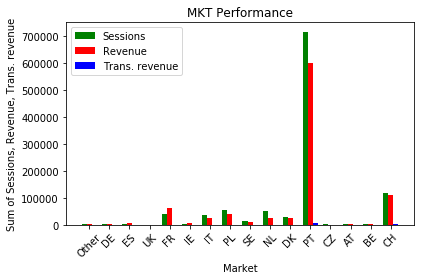

In [56]:
# plotting a barchart that describes the markets performance in terms of Sessions, Revenue and Transaction revenue
n_groups = 16

index = np.arange(n_groups)

rects1 = plt.bar(index +0.10, ga_mkt['sessions'],0.25, color = 'g', label = 'Sessions')

rects2 = plt.bar(index + 0.35, ga_mkt['revenue'], 0.25, color = 'r',label = 'Revenue')

rects3 = plt.bar(index + 0.60, ga_mkt['transaction_revenue'], 0.25, color = 'b',label = 'Trans. revenue')

plt.xlabel('Market')
plt.ylabel('Sum of Sessions, Revenue, Trans. revenue')
plt.title('MKT Performance')
plt.xticks(index + 0.35, ('Other', 'DE', 'ES', 'UK', 'FR', 'IE', 'IT', 'PL', 'SE', 'NL','DK', 'PT', 'CZ', 'AT', 'BE', 'CH')
          ,rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# which the best channel in terms of revenue and transaction revenue?

In [36]:
ga['channel'].nunique()

14

In [37]:
ga['channel'].unique()

array(['Direct', 'Email', 'Referral', 'Organic Social', 'Organic Search',
       'Other Display', 'Paid Search', '(Other)', 'Ecom Affiliates',
       'Other Advertising', 'Paid Search PLA', 'Paid Search Brand',
       'Ecom Paid Social', 'Paid Search DSA'], dtype=object)

In [ ]:
# creating a grouped df by channel 

In [38]:
ga_chnl = ga.groupby('channel', as_index=False).agg({"sessions": "sum","revenue" : "sum", "transaction_revenue" : "sum"})

In [39]:
type(ga_chnl)

pandas.core.frame.DataFrame

In [40]:
ga_chnl

,channel,sessions,revenue,transaction_revenue
0,(Other),1618,361.372111,6
1,Direct,171226,128213.974275,1224
2,Ecom Affiliates,5167,13415.101370,132
3,Ecom Paid Social,19387,7368.111532,99
4,Email,120386,127312.957980,1256
5,Organic Search,430258,301832.832182,3028
6,Organic Social,6027,2792.256768,33
7,Other Advertising,106,0.000000,0
8,Other Display,14829,41423.309850,440
9,Paid Search,1998,1506.130156,14


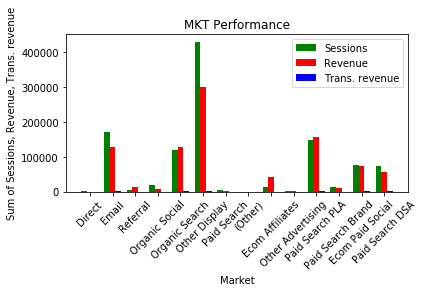

In [45]:
# plotting a barchart that describes the channels performance in terms of Sessions, Revenue and Transaction revenue
n_groups = 14

index = np.arange(n_groups)

rects1 = plt.bar(index +0.10, ga_chnl['sessions'],0.25, color = 'g', label = 'Sessions')

rects2 = plt.bar(index + 0.35, ga_chnl['revenue'], 0.25, color = 'r',label = 'Revenue')

rects3 = plt.bar(index + 0.60, ga_chnl['transaction_revenue'], 0.25, color = 'b',label = 'Trans. revenue')

plt.xlabel('Market')
plt.ylabel('Sum of Sessions, Revenue, Trans. revenue')
plt.title('MKT Performance')
plt.xticks(index + 0.35, ('Direct','Email','Referral','Organic Social','Organic Search','Other Display','Paid Search','(Other)','Ecom Affiliates','Other Advertising','Paid Search PLA','Paid Search Brand','Ecom Paid Social','Paid Search DSA')
          ,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()